In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# => 총 리드타임(종속변수)를 보면

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/프로그래밍 언어 공부 자료/인공지능/2022 데청캠/기업 프로젝트/데이터/최종데이터셋(공정명 가독성 좋게 만듬).xlsx")
df

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임,CNC_입고량,...,CNC/선반/SAW 리드타임,MCT/밀링/TAP 리드타임,세정 리드타임,외주가공 리드타임,용접 리드타임,타각 리드타임,후처리 리드타임,총 리드타임,총생산량,총 입고량
0,2022-02-11,1-4 INCH TUBE,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,20.0,120.0,120.0,120.0,3960.0,33.0,0.0,...,54.91,223.90,0.00,0.0,0.00,0.0,0.0,278.81,120.0,120.0
1,2021-11-02,125A TEE PIPE,MCT/밀링/TAP 리드타임,30.0,28.0,28.0,28.0,5516.0,197.0,0.0,...,0.00,1152.03,0.00,0.0,0.00,0.0,0.0,1152.03,14.0,28.0
2,2021-07-07,125A TEE SCH10S,MCT/밀링/TAP 리드타임+세정 리드타임,50.0,12.0,12.0,12.0,2280.0,190.0,0.0,...,0.00,1742.67,313.67,0.0,0.00,0.0,0.0,2056.34,6.0,12.0
3,2021-07-08,125A TEE SCH10S,MCT/밀링/TAP 리드타임,30.0,58.0,58.0,58.0,10904.0,188.0,0.0,...,0.00,1504.83,0.00,0.0,0.00,0.0,0.0,1504.83,29.0,58.0
4,2022-02-10,125A TEE SCH10S,MCT/밀링/TAP 리드타임,40.0,34.0,34.0,34.0,6630.0,195.0,0.0,...,0.00,1561.88,0.00,0.0,0.00,0.0,0.0,1561.88,17.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,2022-01-26,수명예지 ANODE,CNC/선반/SAW 리드타임,15.0,2.0,2.0,2.0,102.0,51.0,0.0,...,2896.00,0.00,0.00,0.0,0.00,0.0,0.0,2896.00,2.0,2.0
880,2022-01-26,수명예지 TORCH UNDER BODY,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,27.5,2.0,2.0,2.0,1286.0,643.0,0.0,...,50716.00,38962.00,0.00,0.0,0.00,0.0,0.0,89678.00,2.0,2.0
881,2022-01-26,수명예지 TORCH UPPER BODY,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,15.0,2.0,2.0,2.0,404.0,202.0,0.0,...,1674.00,18432.00,0.00,0.0,0.00,0.0,0.0,20106.00,2.0,2.0
882,2021-08-05,엔코더 커플링,MCT/밀링/TAP 리드타임,20.0,2.0,2.0,2.0,675.0,337.5,0.0,...,0.00,23860.00,0.00,0.0,0.00,0.0,0.0,23860.00,2.0,2.0


In [ ]:
# groupby
df['총 리드타임'].groupby(df['공정']).describe() # 대표치가 평균이 아니고 50%

,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,246.0,11958.072602,48439.281349,0.22,775.2850,2621.210,6963.8900,585228.80
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,114.0,19278.488246,43259.182333,1.80,2429.3250,5719.585,13881.8750,268707.00
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,33.0,26778.371212,34361.179057,142.00,5751.8000,12056.650,32565.5000,121542.52
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임+ 후처리 리드타임,1.0,90.900000,NaN,90.90,90.9000,90.900,90.9000,90.90
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임타각 리드타임,1.0,117938.780000,NaN,117938.78,117938.7800,117938.780,117938.7800,117938.78
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 후처리 리드타임,1.0,156705.000000,NaN,156705.00,156705.0000,156705.000,156705.0000,156705.00
CNC/선반/SAW 리드타임+ 세정 리드타임,37.0,8046.716757,13156.962896,0.96,1745.8300,4169.280,8050.8000,74612.92
CNC/선반/SAW 리드타임+ 외주가공 리드타임,1.0,35555.380000,NaN,35555.38,35555.3800,35555.380,35555.3800,35555.38
CNC/선반/SAW 리드타임+ 후처리 리드타임,1.0,43927.450000,NaN,43927.45,43927.4500,43927.450,43927.4500,43927.45


In [ ]:
# 1. 1행 11행을 보면 cnc보다 mct 리드타임이 더 오래걸린다. (의미없다고 판단됨)

In [ ]:
# 2. cnc+mct가 cnc+세정보다 오래걸린다. 

df[df["공정"] == "CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임"]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임,CNC_입고량,...,CNC/선반/SAW 리드타임,MCT/밀링/TAP 리드타임,세정 리드타임,외주가공 리드타임,용접 리드타임,타각 리드타임,후처리 리드타임,총 리드타임,총생산량,총 입고량
0,2022-02-11,1-4 INCH TUBE,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,20.0,120.0,120.0,120.0,3960.0,33.0,0.0,...,54.91,223.90,0.0,0.0,0.0,0.0,0.0,278.81,120.000000,120.0
20,2022-02-07,65A PIPE SCH10S,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,25.0,2.0,2.0,2.0,1908.0,954.0,0.0,...,7267.00,1104.50,0.0,0.0,0.0,0.0,0.0,8371.50,2.000000,2.0
48,2020-10-07,ARM BRACKET-1,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,30.0,30.0,30.0,30.0,6000.0,200.0,0.0,...,563.40,917.90,0.0,0.0,0.0,0.0,0.0,1481.30,30.000000,30.0
54,2022-01-27,ARM BRACKET-1,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,20.0,24.0,30.0,24.0,4920.0,205.0,0.0,...,1127.50,919.50,0.0,0.0,0.0,0.0,0.0,2047.00,13.333333,30.0
56,2022-02-25,ARM BRACKET-1,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,15.0,10.0,10.0,10.0,2800.0,280.0,10.0,...,1240.00,4080.00,0.0,0.0,0.0,0.0,0.0,5320.00,10.000000,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,2022-03-18,YPS-04U MAIN CHAMBER FLANGE-2,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,30.0,20.0,20.0,20.0,8140.0,407.0,0.0,...,728.05,863.85,0.0,0.0,0.0,0.0,0.0,1591.90,20.000000,20.0
871,2021-05-06,무산소동 ANODE,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,15.0,76.0,76.0,76.0,2812.0,37.0,0.0,...,1.12,373.24,0.0,0.0,0.0,0.0,0.0,374.36,50.000000,76.0
873,2021-09-06,무산소동 ANODE,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,0.0,0.0,0.0,0.0,0.0,0.0,160.0,...,15340.37,517.74,0.0,0.0,0.0,0.0,0.0,15858.11,38.000000,160.0
880,2022-01-26,수명예지 TORCH UNDER BODY,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,27.5,2.0,2.0,2.0,1286.0,643.0,0.0,...,50716.00,38962.00,0.0,0.0,0.0,0.0,0.0,89678.00,2.000000,2.0


In [ ]:
df[df["공정"] == "CNC/선반/SAW 리드타임+ 세정 리드타임"]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임,CNC_입고량,...,CNC/선반/SAW 리드타임,MCT/밀링/TAP 리드타임,세정 리드타임,외주가공 리드타임,용접 리드타임,타각 리드타임,후처리 리드타임,총 리드타임,총생산량,총 입고량
22,2020-12-14,ANODE,CNC/선반/SAW 리드타임+ 세정 리드타임,0.0,0.0,0.0,0.0,0.0,0.0,50.000000,...,5698.79,0.0,8217.97,0.0,0.0,0.0,0.0,13916.76,39.000000,50.000000
24,2021-01-12,ANODE,CNC/선반/SAW 리드타임+ 세정 리드타임,0.0,0.0,0.0,0.0,0.0,0.0,20.000000,...,11856.72,0.0,1320.00,0.0,0.0,0.0,0.0,13176.72,26.000000,20.000000
25,2021-02-01,ANODE,CNC/선반/SAW 리드타임+ 세정 리드타임,0.0,0.0,0.0,0.0,0.0,0.0,50.000000,...,7521.00,0.0,104.60,0.0,0.0,0.0,0.0,7625.60,50.000000,50.000000
27,2021-04-21,ANODE,CNC/선반/SAW 리드타임+ 세정 리드타임,0.0,0.0,0.0,0.0,0.0,0.0,183.333333,...,2.88,0.0,254.64,0.0,0.0,0.0,0.0,257.52,50.000000,183.333333
28,2021-05-18,ANODE,CNC/선반/SAW 리드타임+ 세정 리드타임,0.0,0.0,0.0,0.0,0.0,0.0,254.000000,...,74024.07,0.0,588.85,0.0,0.0,0.0,0.0,74612.92,35.000000,254.000000
45,2022-02-07,ARM BOLT-1,CNC/선반/SAW 리드타임+ 세정 리드타임,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,...,814.00,0.0,3757.66,0.0,0.0,0.0,0.0,4571.66,6.000000,6.000000
46,2022-02-07,ARM BOLT-2,CNC/선반/SAW 리드타임+ 세정 리드타임,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,...,514.66,0.0,3242.34,0.0,0.0,0.0,0.0,3757.00,6.000000,6.000000
60,2021-05-14,ARM BRACKET-2,CNC/선반/SAW 리드타임+ 세정 리드타임,0.0,0.0,0.0,0.0,0.0,0.0,31.000000,...,511.48,0.0,158.84,0.0,0.0,0.0,0.0,670.32,31.000000,31.000000
61,2021-10-15,ARM BRACKET-2,CNC/선반/SAW 리드타임+ 세정 리드타임,0.0,0.0,0.0,0.0,0.0,0.0,21.000000,...,4473.52,0.0,280.86,0.0,0.0,0.0,0.0,4754.38,21.000000,21.000000
63,2022-02-28,ARM BRACKET-2,CNC/선반/SAW 리드타임+ 세정 리드타임,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,...,1233.60,0.0,540.80,0.0,0.0,0.0,0.0,1774.40,10.000000,10.000000


In [ ]:
# 3. 같은 공정을 거쳐도 제품별 총 리드타임이 최소 0.1에서 최대 50만까지 차이가 상당함

# => cnc 사이클 타임(종속변수)를 보면

In [ ]:
dfCnc = df[['날짜', '품명', '공정', 'CNC_입고량', 'CNC_생산량', 'CNC_양품수', 'CNC_표준공수',
       'CNC사이클타임']]

dfCnc = dfCnc[dfCnc["CNC사이클타임"] > 0]
dfCnc = dfCnc.drop([273, 275, 303, 492, 826, 144, 487], axis = 0)
dfCnc

,날짜,품명,공정,CNC_입고량,CNC_생산량,CNC_양품수,CNC_표준공수,CNC사이클타임
22,2020-12-14,ANODE,CNC/선반/SAW 리드타임+ 세정 리드타임,50.0,50.000000,50.000000,12950.0,259.000000
23,2021-01-11,ANODE,CNC/선반/SAW 리드타임,80.0,80.000000,80.000000,65760.0,822.000000
24,2021-01-12,ANODE,CNC/선반/SAW 리드타임+ 세정 리드타임,20.0,20.000000,20.000000,16440.0,822.000000
25,2021-02-01,ANODE,CNC/선반/SAW 리드타임+ 세정 리드타임,50.0,28.500000,28.500000,8995.5,512.000000
26,2021-02-09,ANODE,CNC/선반/SAW 리드타임,187.0,52.000000,52.000000,42016.0,808.000000
...,...,...,...,...,...,...,...,...
869,2021-01-12,무산소동 ANODE,CNC/선반/SAW 리드타임,18.0,18.000000,18.000000,2934.0,163.000000
873,2021-09-06,무산소동 ANODE,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,160.0,47.000000,47.000000,9259.0,197.000000
874,2022-02-15,무산소동 ANODE,CNC/선반/SAW 리드타임,129.0,44.333333,44.333333,24115.0,698.333333
875,2022-02-21,무산소동 ANODE,CNC/선반/SAW 리드타임,55.0,25.000000,25.000000,5075.0,203.000000


In [ ]:
dfCnc['CNC사이클타임'].groupby(dfCnc['품명']).describe() # 대표치가 평균이 아니고 50%

,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
ANODE,21.0,592.031746,243.644502,63.000000,512.000000,734.000000,754.000000,822.000000
ANODE BUSH,1.0,78.666667,NaN,78.666667,78.666667,78.666667,78.666667,78.666667
ARM,1.0,77.000000,NaN,77.000000,77.000000,77.000000,77.000000,77.000000
ARM BOLT-1,1.0,192.000000,NaN,192.000000,192.000000,192.000000,192.000000,192.000000
ARM BOLT-2,1.0,192.000000,NaN,192.000000,192.000000,192.000000,192.000000,192.000000
...,...,...,...,...,...,...,...,...
UPPER ADAPTER,1.0,3864.500000,NaN,3864.500000,3864.500000,3864.500000,3864.500000,3864.500000
UPPER FLANGE,3.0,260.833333,136.323451,122.000000,194.000000,266.000000,330.250000,394.500000
VACUUM SUPPORT,1.0,173.500000,NaN,173.500000,173.500000,173.500000,173.500000,173.500000


In [ ]:
# 1. cnc 사이클 타임이 3500이상인 제품이 우리가 찾아야하는 문제의 제품 아닐까?
dfCnc[dfCnc["CNC사이클타임"] > 3500]

,날짜,품명,공정,CNC_입고량,CNC_생산량,CNC_양품수,CNC_표준공수,CNC사이클타임
812,2021-06-01,UPPER ADAPTER,CNC/선반/SAW 리드타임,3.0,3.0,3.0,11593.5,3864.5


In [ ]:
# 이상한 제품이 하나라서 이상한 데이터라고 확정하기 힘듬
dfCnc[dfCnc["품명"] == "UPPER ADAPTER"]

,날짜,품명,공정,CNC_입고량,CNC_생산량,CNC_양품수,CNC_표준공수,CNC사이클타임
812,2021-06-01,UPPER ADAPTER,CNC/선반/SAW 리드타임,3.0,3.0,3.0,11593.5,3864.5


In [ ]:
dfCnc[(dfCnc["CNC사이클타임"] < 3500) & (dfCnc["CNC사이클타임"] > 1500)]

,날짜,품명,공정,CNC_입고량,CNC_생산량,CNC_양품수,CNC_표준공수,CNC사이클타임


# => mct 사이클 타임(종속변수)를 보면

In [ ]:
dfMct = df[df["MCT 사이클타임"] > 0]
dfMct = dfMct[['날짜', '품명', '공정', 'MCT_유실시간', 'MCT_생산량', 'MCT_입고량', 'MCT_양품수',
       'MCT_표준공수', 'MCT 사이클타임']]
dfMct

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
0,2022-02-11,1-4 INCH TUBE,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,20.0,120.0,120.0,120.0,3960.0,33.0
1,2021-11-02,125A TEE PIPE,MCT/밀링/TAP 리드타임,30.0,28.0,28.0,28.0,5516.0,197.0
2,2021-07-07,125A TEE SCH10S,MCT/밀링/TAP 리드타임+세정 리드타임,50.0,12.0,12.0,12.0,2280.0,190.0
3,2021-07-08,125A TEE SCH10S,MCT/밀링/TAP 리드타임,30.0,58.0,58.0,58.0,10904.0,188.0
4,2022-02-10,125A TEE SCH10S,MCT/밀링/TAP 리드타임,40.0,34.0,34.0,34.0,6630.0,195.0
...,...,...,...,...,...,...,...,...,...
879,2022-01-26,수명예지 ANODE,CNC/선반/SAW 리드타임,15.0,2.0,2.0,2.0,102.0,51.0
880,2022-01-26,수명예지 TORCH UNDER BODY,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,27.5,2.0,2.0,2.0,1286.0,643.0
881,2022-01-26,수명예지 TORCH UPPER BODY,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,15.0,2.0,2.0,2.0,404.0,202.0
882,2021-08-05,엔코더 커플링,MCT/밀링/TAP 리드타임,20.0,2.0,2.0,2.0,675.0,337.5


In [ ]:
# 1. mct 사이클 타임이 8000이상인 제품이 우리가 찾아야하는 문제의 제품 아닐까?
dfMct[dfMct["MCT 사이클타임"] > 8000]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
653,2022-04-06,SE TRAP BODY INNER PIPE FLANGE,CNC/선반/SAW 리드타임,180.0,1.0,3.0,1.0,10800.0,10800.0


In [ ]:
dfMct[dfMct["품명"] == "SE TRAP BODY INNER PIPE FLANGE"]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
653,2022-04-06,SE TRAP BODY INNER PIPE FLANGE,CNC/선반/SAW 리드타임,180.0,1.0,3.0,1.0,10800.0,10800.0
654,2022-04-07,SE TRAP BODY INNER PIPE FLANGE,MCT/밀링/TAP 리드타임+ 세정 리드타임,0.0,2.0,0.0,2.0,9700.0,4850.0


In [ ]:
dfMct[(dfMct["MCT 사이클타임"] < 8000) & (dfMct["MCT 사이클타임"] > 5000)]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
516,2022-01-27,MIDDLE FLANGE,MCT/밀링/TAP 리드타임+ 세정 리드타임,90.0,1.0,1.0,1.0,5400.0,5400.0
781,2022-01-27,TOP FLANGE,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,90.0,1.0,1.0,1.0,5400.0,5400.0


In [ ]:
# 이건 이상한 제품이 하나라서 이상한 데이터라고 확정하기 힘듬
dfMct[dfMct["품명"] == "MIDDLE FLANGE"]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
516,2022-01-27,MIDDLE FLANGE,MCT/밀링/TAP 리드타임+ 세정 리드타임,90.0,1.0,1.0,1.0,5400.0,5400.0


In [ ]:
# 이건 무조건 찾아야한다.!!!!
dfMct[dfMct["품명"] == "TOP FLANGE"]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
763,2020-10-24,TOP FLANGE,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,20.0,17.0,17.0,17.0,28560.0,320.0
764,2020-12-24,TOP FLANGE,MCT/밀링/TAP 리드타임+ 세정 리드타임,30.0,39.0,39.0,39.0,16380.0,420.0
765,2021-02-03,TOP FLANGE,CNC/선반/SAW 리드타임+ 세정 리드타임,25.0,10.0,10.0,10.0,4500.0,450.0
766,2021-02-18,TOP FLANGE,CNC/선반/SAW 리드타임,40.0,20.0,20.0,20.0,8500.0,425.0
767,2021-03-02,TOP FLANGE,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,20.0,3.0,9.0,3.0,960.0,320.0
768,2021-03-30,TOP FLANGE,MCT/밀링/TAP 리드타임+ 세정 리드타임,25.0,10.0,10.0,10.0,4200.0,420.0
769,2021-04-30,TOP FLANGE,CNC/선반/SAW 리드타임,25.0,14.0,30.0,14.0,5404.0,386.0
770,2021-05-01,TOP FLANGE,MCT/밀링/TAP 리드타임,0.0,16.0,0.0,16.0,6176.0,386.0
771,2021-05-03,TOP FLANGE,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,20.0,3.5,3.5,3.5,1740.0,540.0
772,2021-05-14,TOP FLANGE,MCT/밀링/TAP 리드타임+ 세정 리드타임,30.0,4.5,17.5,4.5,1996.0,466.5


In [ ]:
dfMct[(dfMct["MCT 사이클타임"] < 5000) & (dfMct["MCT 사이클타임"] > 4000)]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
406,2020-12-16,GEAR UNDER HOUSING,MCT/밀링/TAP 리드타임,0.0,2.0,0.0,2.0,8500.0,4250.0
407,2021-10-26,GEAR UNDER HOUSING,MCT/밀링/TAP 리드타임+세정 리드타임,0.0,4.0,0.0,4.0,17100.0,4275.0
408,2022-04-28,GEAR UNDER HOUSING,MCT/밀링/TAP 리드타임,60.0,3.0,30.0,3.0,13320.0,4440.0
409,2022-05-02,GEAR UNDER HOUSING,MCT/밀링/TAP 리드타임+세정 리드타임,0.0,6.0,0.0,6.0,26640.0,4440.0
654,2022-04-07,SE TRAP BODY INNER PIPE FLANGE,MCT/밀링/TAP 리드타임+ 세정 리드타임,0.0,2.0,0.0,2.0,9700.0,4850.0
756,2021-09-02,TABLE,CNC/선반/SAW 리드타임,80.0,1.0,3.0,1.0,4800.0,4800.0


In [ ]:
# 아주 이쁘게 잘 있다
dfMct[dfMct["품명"] == "GEAR UNDER HOUSING"]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
406,2020-12-16,GEAR UNDER HOUSING,MCT/밀링/TAP 리드타임,0.0,2.0,0.0,2.0,8500.0,4250.0
407,2021-10-26,GEAR UNDER HOUSING,MCT/밀링/TAP 리드타임+세정 리드타임,0.0,4.0,0.0,4.0,17100.0,4275.0
408,2022-04-28,GEAR UNDER HOUSING,MCT/밀링/TAP 리드타임,60.0,3.0,30.0,3.0,13320.0,4440.0
409,2022-05-02,GEAR UNDER HOUSING,MCT/밀링/TAP 리드타임+세정 리드타임,0.0,6.0,0.0,6.0,26640.0,4440.0


In [ ]:
#(아까 찾은 그거네) 이건 같은 제품이긴 한데 다른 공정이라서 문제인지 모르겠다.
dfMct[dfMct["품명"] == "SE TRAP BODY INNER PIPE FLANGE"]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
653,2022-04-06,SE TRAP BODY INNER PIPE FLANGE,CNC/선반/SAW 리드타임,180.0,1.0,3.0,1.0,10800.0,10800.0
654,2022-04-07,SE TRAP BODY INNER PIPE FLANGE,MCT/밀링/TAP 리드타임+ 세정 리드타임,0.0,2.0,0.0,2.0,9700.0,4850.0


In [ ]:
# 이것도 3 ~4000으로 나오는 애들 찾아야 한다.
dfMct[dfMct["품명"] == "TABLE"]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
752,2021-04-15,TABLE,MCT/밀링/TAP 리드타임,20.0,2.0,2.0,2.0,1248.0,624.0
754,2021-05-12,TABLE,MCT/밀링/TAP 리드타임,30.0,5.0,5.0,5.0,3095.0,619.0
755,2021-07-01,TABLE,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,30.0,32.0,32.0,32.0,15488.0,484.0
756,2021-09-02,TABLE,CNC/선반/SAW 리드타임,80.0,1.0,3.0,1.0,4800.0,4800.0
757,2021-09-03,TABLE,MCT/밀링/TAP 리드타임+ 세정 리드타임,0.0,2.0,0.0,2.0,7194.0,3597.0
759,2021-11-28,TABLE,MCT/밀링/TAP 리드타임,0.0,2.0,0.0,2.0,7194.0,3597.0
760,2021-11-29,TABLE,세정 리드타임,30.0,2.0,2.0,2.0,1800.0,900.0
761,2021-12-24,TABLE,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,25.0,2.0,2.0,2.0,1248.0,624.0


In [ ]:
dfMct[(dfMct["MCT 사이클타임"] < 4000) & (dfMct["MCT 사이클타임"] > 3000)]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
138,2020-12-07,BOTTOM FLANGE,MCT/밀링/TAP 리드타임+세정 리드타임,60.0,1.0,1.0,1.0,3000.0,3600.0
170,2021-08-02,BOTTOM FLANGE PLATE,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,60.0,1.0,1.0,1.0,3600.0,3600.0
368,2022-05-02,COVER MAIN FLANGE,MCT/밀링/TAP 리드타임+세정 리드타임,60.0,1.0,1.0,1.0,3600.0,3600.0
370,2020-10-30,DGV350 JIS LOWER JIG,MCT/밀링/TAP 리드타임+세정 리드타임,60.0,1.0,1.0,1.0,3600.0,3600.0
636,2021-08-09,REDUCER,CNC/선반/SAW 리드타임,60.0,1.0,1.0,1.0,3600.0,3600.0
757,2021-09-03,TABLE,MCT/밀링/TAP 리드타임+ 세정 리드타임,0.0,2.0,0.0,2.0,7194.0,3597.0
759,2021-11-28,TABLE,MCT/밀링/TAP 리드타임,0.0,2.0,0.0,2.0,7194.0,3597.0
839,2021-06-24,UTILITY SUPPORT #2-1,MCT/밀링/TAP 리드타임,0.0,25.0,0.0,25.0,90000.0,3600.0


In [ ]:
# 이거 무조건 찾아야한다 다 3,4,500 인데 1800, 3600 뜸
dfMct[dfMct["품명"] == "BOTTOM FLANGE"]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
138,2020-12-07,BOTTOM FLANGE,MCT/밀링/TAP 리드타임+세정 리드타임,60.0,1.0,1.0,1.0,3000.0,3600.0
139,2021-02-03,BOTTOM FLANGE,세정 리드타임,20.0,10.0,10.0,10.0,2900.0,290.0
140,2021-03-27,BOTTOM FLANGE,CNC/선반/SAW 리드타임,35.0,20.0,20.0,20.0,12360.0,618.0
141,2021-04-12,BOTTOM FLANGE,CNC/선반/SAW 리드타임,35.0,72.0,100.0,72.0,19800.0,275.0
142,2021-04-13,BOTTOM FLANGE,MCT/밀링/TAP 리드타임,0.0,28.0,0.0,28.0,7700.0,275.0
143,2021-04-14,BOTTOM FLANGE,CNC/선반/SAW 리드타임,40.0,52.0,76.0,52.0,14820.0,285.0
144,2021-04-15,BOTTOM FLANGE,MCT/밀링/TAP 리드타임+세정 리드타임,0.0,24.0,0.0,24.0,6840.0,285.0
145,2021-05-04,BOTTOM FLANGE,CNC/선반/SAW 리드타임,25.0,20.0,30.0,20.0,10860.0,543.0
146,2021-05-05,BOTTOM FLANGE,MCT/밀링/TAP 리드타임,0.0,10.0,0.0,10.0,5430.0,543.0
147,2021-05-13,BOTTOM FLANGE,CNC/선반/SAW 리드타임+ 세정 리드타임,30.0,1.0,1.0,1.0,1800.0,1800.0


In [ ]:
# 하나라서 확정 아님
dfMct[dfMct["품명"] == "BOTTOM FLANGE PLATE"]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
170,2021-08-02,BOTTOM FLANGE PLATE,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,60.0,1.0,1.0,1.0,3600.0,3600.0


In [ ]:
# 이건 같은 제품이긴 한데 다른 공정이라서 문제인지 모르겠다.
dfMct[dfMct["품명"] == "COVER MAIN FLANGE"]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
367,2021-10-10,COVER MAIN FLANGE,MCT/밀링/TAP 리드타임,50.0,2.0,2.0,2.0,3652.0,1826.0
368,2022-05-02,COVER MAIN FLANGE,MCT/밀링/TAP 리드타임+세정 리드타임,60.0,1.0,1.0,1.0,3600.0,3600.0


In [ ]:
# 하나
dfMct[dfMct["품명"] == "DGV350 JIS LOWER JIG"]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
370,2020-10-30,DGV350 JIS LOWER JIG,MCT/밀링/TAP 리드타임+세정 리드타임,60.0,1.0,1.0,1.0,3600.0,3600.0


In [ ]:
# 하나
dfMct[dfMct["품명"] == "REDUCER"]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
636,2021-08-09,REDUCER,CNC/선반/SAW 리드타임,60.0,1.0,1.0,1.0,3600.0,3600.0


In [ ]:
# 아까 위에서 함
dfMct[dfMct["품명"] == "TABLE"]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
752,2021-04-15,TABLE,MCT/밀링/TAP 리드타임,20.0,2.0,2.0,2.0,1248.0,624.0
754,2021-05-12,TABLE,MCT/밀링/TAP 리드타임,30.0,5.0,5.0,5.0,3095.0,619.0
755,2021-07-01,TABLE,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,30.0,32.0,32.0,32.0,15488.0,484.0
756,2021-09-02,TABLE,CNC/선반/SAW 리드타임,80.0,1.0,3.0,1.0,4800.0,4800.0
757,2021-09-03,TABLE,MCT/밀링/TAP 리드타임+ 세정 리드타임,0.0,2.0,0.0,2.0,7194.0,3597.0
759,2021-11-28,TABLE,MCT/밀링/TAP 리드타임,0.0,2.0,0.0,2.0,7194.0,3597.0
760,2021-11-29,TABLE,세정 리드타임,30.0,2.0,2.0,2.0,1800.0,900.0
761,2021-12-24,TABLE,CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,25.0,2.0,2.0,2.0,1248.0,624.0


In [ ]:
# 무조건 찾아야함
dfMct[dfMct["품명"] == "UTILITY SUPPORT #2-1"]

,날짜,품명,공정,MCT_유실시간,MCT_생산량,MCT_입고량,MCT_양품수,MCT_표준공수,MCT 사이클타임
838,2021-01-04,UTILITY SUPPORT #2-1,MCT/밀링/TAP 리드타임+ 세정 리드타임,0.0,19.0,0.0,19.0,15200.0,800.0
839,2021-06-24,UTILITY SUPPORT #2-1,MCT/밀링/TAP 리드타임,0.0,25.0,0.0,25.0,90000.0,3600.0
840,2021-10-05,UTILITY SUPPORT #2-1,MCT/밀링/TAP 리드타임,0.0,11.0,0.0,11.0,8822.0,802.0


# => 날짜(독립변수)를 보면 -> 거리두기 해제 + 코로나랑 연결


1.왜 21년12월부터 리드타임이 늘어나지?
2.생산량이 뛰는 21.5월,8월, 10월, 22년4월은 왜 그럴까?
<br><br>

a) ??? 

b) 21년 7월 1일 거리두기 완화<br> 

c) 21년 10월 18일 거리두기 완화<br> 

d) 22년 4월 18일 거리두기 해제

<br>

3.입고량이 뛰는 21.2월, 3월, 4월, 22년 3월, 4월은 왜 그럴까??


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_

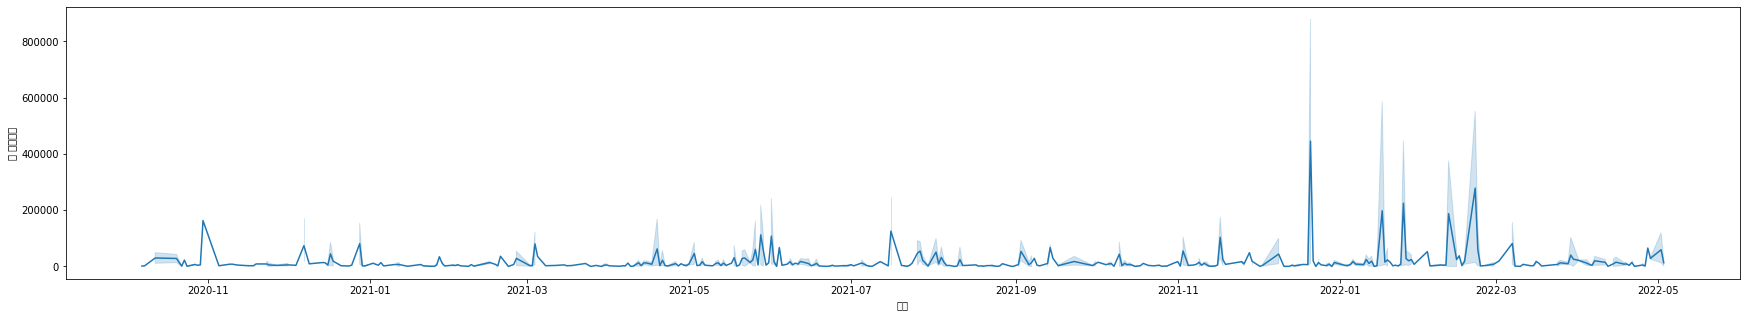

In [ ]:
# 1. 왜 21년 12월부터 리드타임이 늘어나지?

plt.figure(figsize=(30, 5))
sns.lineplot(x="날짜", y="총 리드타임", data = df)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

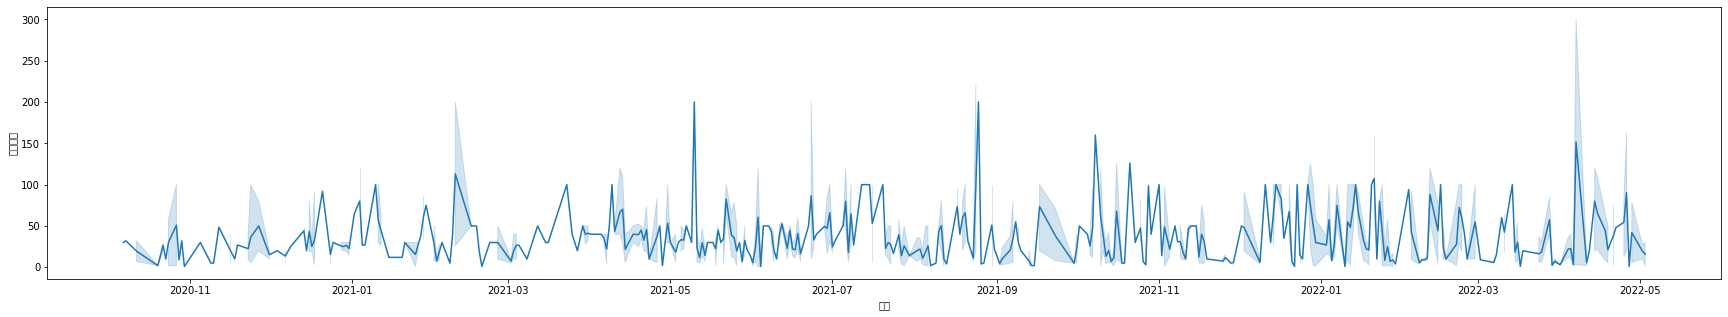

In [ ]:
# 2. 생산량이 뛰는 21.5월,8월, 22년4월은 왜 그럴까?

plt.figure(figsize=(30, 5))
sns.lineplot(x="날짜", y="총생산량", data = df)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

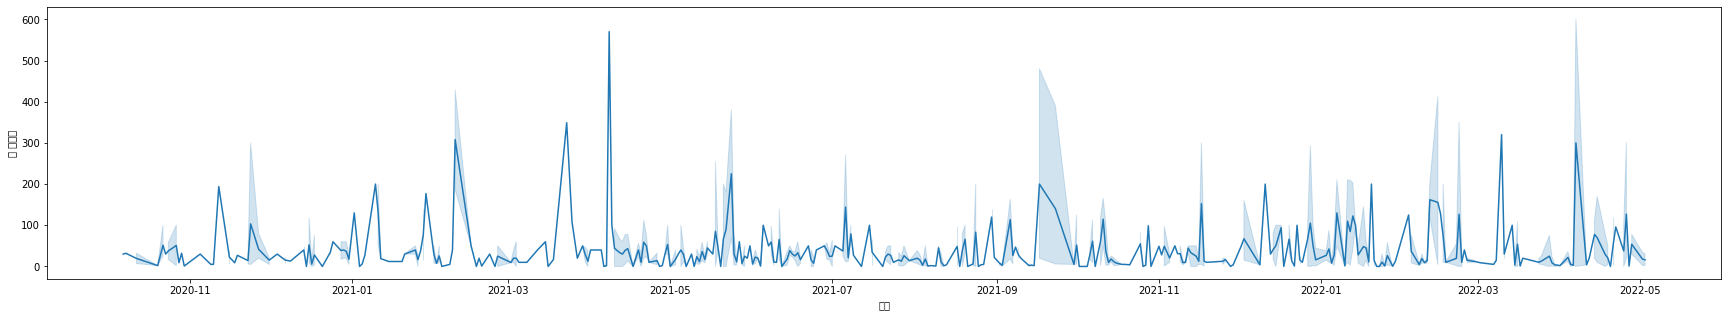

In [ ]:
# 3. 입고량이 뛰는 21.2월, 3월, 4월, 22년 3월, 4월은 왜 그럴까?

plt.figure(figsize=(30, 5))
sns.lineplot(x="날짜", y="총 입고량", data = df)
plt.show()

#=> 품명(독립변수)를 보면 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_

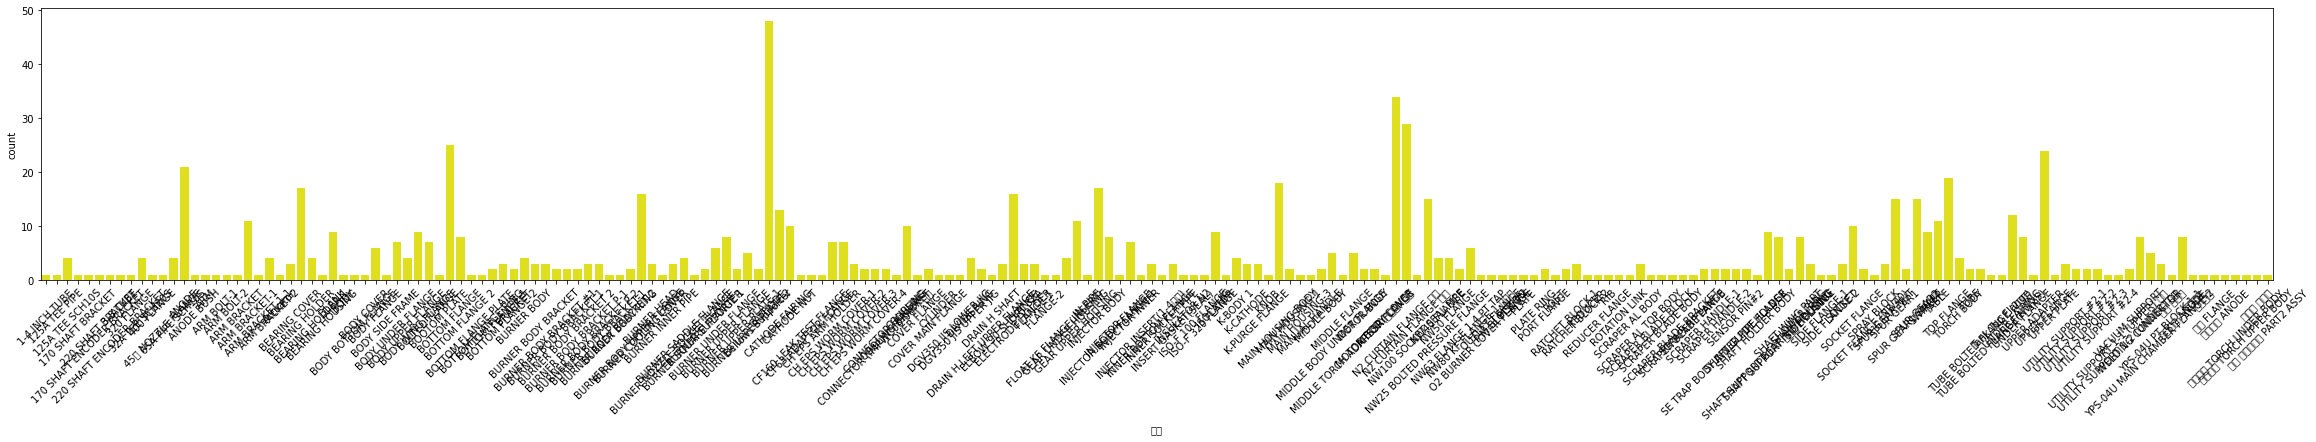

In [ ]:
# 1. count를 세어보면 네개 제품이 눈에 띄게 높다.

plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
sns.countplot(x = '품명', data=df, color = "yellow")
plt.show()

# => 공정(독립변수)를 보면 -> 이 밑은 같은 제품이 같은 공정을 다룰때 다른 리드타임이 나오는 것으로 필요없다고 하신다.

- 내가 원하는 것 : describe를 보면 어떤 제품이 어떤 공정을 거치는데 그러면 제품 별로 어떨 때 리드타임이 다르게 나오는지 볼 수 있지 않을까?

In [ ]:
df[df["공정"] == 'CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임']["총 리드타임"].groupby(df["품명"]).describe() 

,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
1-4 INCH TUBE,1.0,278.810000,NaN,278.81,278.8100,278.810,278.8100,278.81
65A PIPE SCH10S,1.0,8371.500000,NaN,8371.50,8371.5000,8371.500,8371.5000,8371.50
ARM BRACKET-1,3.0,2949.433333,2072.364317,1481.30,1764.1500,2047.000,3683.5000,5320.00
BEARING COVER,1.0,9857.000000,NaN,9857.00,9857.0000,9857.000,9857.0000,9857.00
BEARING HOLDER-1,1.0,1411.630000,NaN,1411.63,1411.6300,1411.630,1411.6300,1411.63
...,...,...,...,...,...,...,...,...
UPPER FLANGE,3.0,23479.506667,26354.006654,5247.75,8371.2600,11494.770,32595.3850,53696.00
YPS-04U MAIN CHAMBER FLANGE-2,1.0,1591.900000,NaN,1591.90,1591.9000,1591.900,1591.9000,1591.90
무산소동 ANODE,2.0,8116.235000,10948.664623,374.36,4245.2975,8116.235,11987.1725,15858.11


In [ ]:
df[df["공정"] == 'MCT/밀링/TAP 리드타임']["총 리드타임"].groupby(df["품명"]).describe()

,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
125A TEE PIPE,1.0,1152.030000,NaN,1152.03,1152.030,1152.03,1152.030,1152.03
125A TEE SCH10S,3.0,1124.500000,708.731902,306.79,905.810,1504.83,1533.355,1561.88
170 SHAFT BRACKET,1.0,233427.000000,NaN,233427.00,233427.000,233427.00,233427.000,233427.00
170 SHAFT ENCODER BRACKET,1.0,227353.000000,NaN,227353.00,227353.000,227353.00,227353.000,227353.00
220 SHAFT BRACKET,1.0,11146.500000,NaN,11146.50,11146.500,11146.50,11146.500,11146.50
...,...,...,...,...,...,...,...,...
YPS-04U MAIN CHAMBER FLANGE-2,1.0,6885.250000,NaN,6885.25,6885.250,6885.25,6885.250,6885.25
YPS-04U PT BLOCK-1-1,3.0,4182.396667,1148.589610,2909.53,3702.845,4496.16,4818.830,5141.50
무산소동 ANODE,1.0,1648.720000,NaN,1648.72,1648.720,1648.72,1648.720,1648.72


In [ ]:
df[df["공정"] ==  'MCT/밀링/TAP 리드타임+세정 리드타임']["총 리드타임"].groupby(df["품명"]).describe()

,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
125A TEE SCH10S,1.0,2056.340000,NaN,2056.34,2056.3400,2056.340,2056.3400,2056.34
3-8 TUBE,1.0,4004.550000,NaN,4004.55,4004.5500,4004.550,4004.5500,4004.55
32A TEE SCH20S,4.0,950.760000,263.501092,677.45,756.2600,945.765,1140.2650,1234.06
400 FLANGE,1.0,43141.500000,NaN,43141.50,43141.5000,43141.500,43141.5000,43141.50
45도 NOZZLE FLANGE,1.0,28568.800000,NaN,28568.80,28568.8000,28568.800,28568.8000,28568.80
ARM BRACKET-1,5.0,6946.086000,2665.796703,3023.54,5542.2900,8008.900,8425.7500,9729.95
BEARING COVER,2.0,27968.600000,18140.683050,15141.20,21554.9000,27968.600,34382.3000,40796.00
BEARING HOLDER,8.0,9637.896250,7177.388302,2373.90,2615.0150,9098.170,14072.2250,21125.23
BEARING HOLDER-1,1.0,4932.730000,NaN,4932.73,4932.7300,4932.730,4932.7300,4932.73


In [ ]:
df[df["공정"] == 'CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임']["총 리드타임"].groupby(df["품명"]).describe()

,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
320 FLANGE,1.0,13600.0000,NaN,13600.00,13600.0000,13600.000,13600.0000,13600.00
65A PIPE SCH10S,1.0,4011.0000,NaN,4011.00,4011.0000,4011.000,4011.0000,4011.00
ARM BRACKET-1,1.0,2105.7000,NaN,2105.70,2105.7000,2105.700,2105.7000,2105.70
BEARING HOLDER,1.0,2891.7700,NaN,2891.77,2891.7700,2891.770,2891.7700,2891.77
BLANK,1.0,27416.0000,NaN,27416.00,27416.0000,27416.000,27416.0000,27416.00
BODY BOTTOM FLANGE,1.0,9258.0000,NaN,9258.00,9258.0000,9258.000,9258.0000,9258.00
BODY WING FLANGE,1.0,24201.5000,NaN,24201.50,24201.5000,24201.500,24201.5000,24201.50
BOTTOM FLANGE,4.0,44148.7425,46666.368839,24.21,8704.2525,38475.300,73919.7900,99620.16
BOTTOM FLANGE 2,1.0,3341.5000,NaN,3341.50,3341.5000,3341.500,3341.5000,3341.50


In [ ]:
df[df["공정"] == 'CNC/선반/SAW 리드타임']["총 리드타임"].groupby(df["품명"]).describe()

,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
65A PIPE SCH10S,1.0,0.280000,NaN,0.28,0.280,0.28,0.280,0.28
ANODE,15.0,52262.608667,148175.226729,2.05,1144.095,9942.49,28648.745,585228.80
ANODE BUSH,1.0,2505.420000,NaN,2505.42,2505.420,2505.42,2505.420,2505.42
ARM,1.0,1778.680000,NaN,1778.68,1778.680,1778.68,1778.680,1778.68
ARM BRACKET-1,2.0,1693.570000,773.334402,1146.74,1420.155,1693.57,1966.985,2240.40
...,...,...,...,...,...,...,...,...
VACUUM SUPPORT,1.0,6162.880000,NaN,6162.88,6162.880,6162.88,6162.880,6162.88
YPS-04U MAIN CHAMBER FLANGE-2,1.0,1524.250000,NaN,1524.25,1524.250,1524.25,1524.250,1524.25
무산소동 ANODE,5.0,13040.804000,15478.911379,3.32,6.380,12963.60,14354.820,37875.90


In [ ]:
df[df["공정"] == 'CNC/선반/SAW 리드타임+ 세정 리드타임']["총 리드타임"].groupby(df["품명"]).describe()

,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
ANODE,5.0,21917.904000,29960.947511,257.52,7625.6000,13176.720,13916.7600,74612.92
ARM BOLT-1,1.0,4571.660000,NaN,4571.66,4571.6600,4571.660,4571.6600,4571.66
ARM BOLT-2,1.0,3757.000000,NaN,3757.00,3757.0000,3757.000,3757.0000,3757.00
ARM BRACKET-2,3.0,2399.700000,2112.613687,670.32,1222.3600,1774.400,3264.3900,4754.38
BODY FLANGE,1.0,7363.200000,NaN,7363.20,7363.2000,7363.200,7363.2000,7363.20
BOTTOM FLANGE,6.0,7870.838333,13983.113563,302.00,1965.0000,2748.145,3232.3775,36329.00
FLANGE-2,1.0,8050.800000,NaN,8050.80,8050.8000,8050.800,8050.8000,8050.80
INJECTOR BODY,1.0,2718.520000,NaN,2718.52,2718.5200,2718.520,2718.5200,2718.52
INJECTOR FLANGE,1.0,642.750000,NaN,642.75,642.7500,642.750,642.7500,642.75


In [ ]:
df[df["공정"] == '세정 리드타임']["총 리드타임"].groupby(df["품명"]).describe()

,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
ANODE,1.0,930.720000,NaN,930.72,930.7200,930.720,930.7200,930.72
BODY UNDER FLANGE,1.0,420645.000000,NaN,420645.00,420645.0000,420645.000,420645.0000,420645.00
BOLTED FLANGE,1.0,0.380000,NaN,0.38,0.3800,0.380,0.3800,0.38
BOTTOM FLANGE,2.0,4399.850000,5460.844250,538.45,2469.1500,4399.850,6330.5500,8261.25
BURNER UPPER PLATE 2,1.0,15512.000000,NaN,15512.00,15512.0000,15512.000,15512.0000,15512.00
FLANGE,1.0,1003.240000,NaN,1003.24,1003.2400,1003.240,1003.2400,1003.24
MAIN HOUSING BODY,4.0,18567.967500,11366.000987,6696.42,11300.7075,17391.375,24658.6350,32792.70
N2 CURTAIN FLANGE 상부,1.0,10111.080000,NaN,10111.08,10111.0800,10111.080,10111.0800,10111.08
NW40 FLANGE,1.0,1461.830000,NaN,1461.83,1461.8300,1461.830,1461.8300,1461.83


In [ ]:
df[df["공정"] == 'MCT/밀링/TAP 리드타임+ 세정 리드타임']["총 리드타임"].groupby(df["품명"]).describe()

,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
MAIN HOUSING BODY,2.0,19515.600000,20872.519388,4756.50,12136.0500,19515.600,26895.1500,34274.70
MIDDLE BODY UNDER FLANGE,3.0,24646.133333,19801.997782,10670.80,13315.9000,15961.000,31633.8000,47306.60
MIDDLE FLANGE,1.0,78741.000000,NaN,78741.00,78741.0000,78741.000,78741.0000,78741.00
MIDDLE TORCH ADAPTOR FLANGE,1.0,19574.220000,NaN,19574.22,19574.2200,19574.220,19574.2200,19574.22
MOTOR BODY,1.0,19201.200000,NaN,19201.20,19201.2000,19201.200,19201.2000,19201.20
MOTOR BODY COVER,1.0,9598.400000,NaN,9598.40,9598.4000,9598.400,9598.4000,9598.40
MTSSR(우나사) 너트,1.0,26436.000000,NaN,26436.00,26436.0000,26436.000,26436.0000,26436.00
N2 CURTAIN FLANGE 상부,1.0,32487.800000,NaN,32487.80,32487.8000,32487.800,32487.8000,32487.80
N2 CURTAIN FLANGE 하부,2.0,6129.650000,4035.811954,3275.90,4702.7750,6129.650,7556.5250,8983.40


In [ ]:
arr2 = df["품명"].unique()
arr2

for i in arr2:

  print("제품 "+i)
  display(df[df["품명"] == i]["총 리드타임"].groupby(df["공정"]).describe())
  print('\n\n\n\n')

제품 1-4 INCH TUBE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,278.81,NaN,278.81,278.81,278.81,278.81,278.81







제품 125A TEE PIPE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,1152.03,NaN,1152.03,1152.03,1152.03,1152.03,1152.03







제품 125A TEE SCH10S


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,3.0,1124.50,708.731902,306.79,905.81,1504.83,1533.355,1561.88
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,2056.34,NaN,2056.34,2056.34,2056.34,2056.340,2056.34







제품 170 SHAFT BRACKET


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,233427.0,NaN,233427.0,233427.0,233427.0,233427.0,233427.0







제품 170 SHAFT ENCODER BRACKET


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,227353.0,NaN,227353.0,227353.0,227353.0,227353.0,227353.0







제품 220 SHAFT BRACKET


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,11146.5,NaN,11146.5,11146.5,11146.5,11146.5,11146.5







제품 220 SHAFT ENCODER BRACKET


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,29011.5,NaN,29011.5,29011.5,29011.5,29011.5,29011.5







제품 3-8 TUBE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,4004.55,NaN,4004.55,4004.55,4004.55,4004.55,4004.55







제품 320 FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,13600.0,NaN,13600.0,13600.0,13600.0,13600.0,13600.0







제품 32A TEE SCH20S


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+세정 리드타임,4.0,950.76,263.501092,677.45,756.26,945.765,1140.265,1234.06







제품 400 FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,43141.5,NaN,43141.5,43141.5,43141.5,43141.5,43141.5







제품 45도 NOZZLE FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,28568.8,NaN,28568.8,28568.8,28568.8,28568.8,28568.8







제품 65A PIPE SCH10S


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,0.28,NaN,0.28,0.28,0.28,0.28,0.28
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,8371.50,NaN,8371.50,8371.50,8371.50,8371.50,8371.50
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,4011.00,NaN,4011.00,4011.00,4011.00,4011.00,4011.00
MCT/밀링/TAP 리드타임,1.0,2866.38,NaN,2866.38,2866.38,2866.38,2866.38,2866.38







제품 ANODE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,15.0,52262.608667,148175.226729,2.05,1144.095,9942.49,28648.745,585228.80
CNC/선반/SAW 리드타임+ 세정 리드타임,5.0,21917.904000,29960.947511,257.52,7625.600,13176.72,13916.760,74612.92
세정 리드타임,1.0,930.720000,NaN,930.72,930.720,930.72,930.720,930.72







제품 ANODE BUSH


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,2505.42,NaN,2505.42,2505.42,2505.42,2505.42,2505.42







제품 ARM


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,1778.68,NaN,1778.68,1778.68,1778.68,1778.68,1778.68







제품 ARM BOLT-1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ 세정 리드타임,1.0,4571.66,NaN,4571.66,4571.66,4571.66,4571.66,4571.66







제품 ARM BOLT-2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ 세정 리드타임,1.0,3757.0,NaN,3757.0,3757.0,3757.0,3757.0,3757.0







제품 ARM BRACKET


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,10513.67,NaN,10513.67,10513.67,10513.67,10513.67,10513.67







제품 ARM BRACKET-1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,2.0,1693.570000,773.334402,1146.74,1420.155,1693.57,1966.985,2240.40
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,3.0,2949.433333,2072.364317,1481.30,1764.150,2047.00,3683.500,5320.00
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,2105.700000,NaN,2105.70,2105.700,2105.70,2105.700,2105.70
MCT/밀링/TAP 리드타임+세정 리드타임,5.0,6946.086000,2665.796703,3023.54,5542.290,8008.90,8425.750,9729.95







제품 ARM BRACKET-1-1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,47654.0,NaN,47654.0,47654.0,47654.0,47654.0,47654.0







제품 ARM BRACKET-2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,8572.2,NaN,8572.20,8572.20,8572.2,8572.20,8572.20
CNC/선반/SAW 리드타임+ 세정 리드타임,3.0,2399.7,2112.613687,670.32,1222.36,1774.4,3264.39,4754.38







제품 Actuator


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,17048.7,NaN,17048.7,17048.7,17048.7,17048.7,17048.7







제품 BEARING COVER


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,9857.0,NaN,9857.0,9857.0,9857.0,9857.0,9857.0
MCT/밀링/TAP 리드타임+세정 리드타임,2.0,27968.6,18140.68305,15141.2,21554.9,27968.6,34382.3,40796.0







제품 BEARING HOLDER


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,7.0,3478.915714,3186.573660,44.00,1294.670,1617.54,6181.465,7738.60
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,2891.770000,NaN,2891.77,2891.770,2891.77,2891.770,2891.77
MCT/밀링/TAP 리드타임,1.0,12728.130000,NaN,12728.13,12728.130,12728.13,12728.130,12728.13
MCT/밀링/TAP 리드타임+세정 리드타임,8.0,9637.896250,7177.388302,2373.90,2615.015,9098.17,14072.225,21125.23







제품 BEARING HOLDER-1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,73677.54,NaN,73677.54,73677.54,73677.54,73677.54,73677.54
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,1411.63,NaN,1411.63,1411.63,1411.63,1411.63,1411.63
MCT/밀링/TAP 리드타임,1.0,15995.67,NaN,15995.67,15995.67,15995.67,15995.67,15995.67
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,4932.73,NaN,4932.73,4932.73,4932.73,4932.73,4932.73







제품 BEARING HOUSING


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,27.0,NaN,27.0,27.0,27.0,27.0,27.0







제품 BLANK


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,3.0,2179.933333,1639.012791,1181.34,1234.140,1286.94,2679.230,4071.52
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,27416.000000,NaN,27416.00,27416.000,27416.00,27416.000,27416.00
MCT/밀링/TAP 리드타임,2.0,60164.550000,77434.966623,5409.76,32787.155,60164.55,87541.945,114919.34
MCT/밀링/TAP 리드타임+세정 리드타임,3.0,59377.446667,37654.353995,24652.34,39366.170,54080.00,76740.000,99400.00







제품 BODY


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,25573.98,NaN,25573.98,25573.98,25573.98,25573.98,25573.98







제품 BODY BOTTOM FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,9258.0,NaN,9258.0,9258.0,9258.0,9258.0,9258.0







제품 BODY COVER


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,393.5,NaN,393.5,393.5,393.5,393.5,393.5







제품 BODY FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,3.0,580.800,67.142333,529.53,542.8000,556.070,606.4350,656.80
CNC/선반/SAW 리드타임+ 세정 리드타임,1.0,7363.200,NaN,7363.20,7363.2000,7363.200,7363.2000,7363.20
MCT/밀링/TAP 리드타임+세정 리드타임,2.0,1826.735,1257.426776,937.60,1382.1675,1826.735,2271.3025,2715.87







제품 BODY SIDE FRAME


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,25223.0,NaN,25223.0,25223.0,25223.0,25223.0,25223.0







제품 BODY UNDER FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,4946.000000,NaN,4946.00,4946.00,4946.00,4946.00,4946.00
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,11649.500000,NaN,11649.50,11649.50,11649.50,11649.50,11649.50
MCT/밀링/TAP 리드타임,1.0,3545.700000,NaN,3545.70,3545.70,3545.70,3545.70,3545.70
MCT/밀링/TAP 리드타임+세정 리드타임,3.0,8071.123333,4386.584056,3129.89,6353.56,9577.23,10541.74,11506.25
세정 리드타임,1.0,420645.000000,NaN,420645.00,420645.00,420645.00,420645.00,420645.00







제품 BODY UPPER FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,2471.170,NaN,2471.17,2471.1700,2471.170,2471.1700,2471.17
MCT/밀링/TAP 리드타임,2.0,3803.865,142.361808,3703.20,3753.5325,3803.865,3854.1975,3904.53
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,8907.410,NaN,8907.41,8907.4100,8907.410,8907.4100,8907.41







제품 BODY WING FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,1832.900000,NaN,1832.90,1832.900,1832.90,1832.900,1832.90
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,3.0,74587.233333,123934.842313,2024.71,3035.800,4046.89,110868.495,217690.10
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,24201.500000,NaN,24201.50,24201.500,24201.50,24201.500,24201.50
MCT/밀링/TAP 리드타임,3.0,20212.456667,25000.366750,4311.10,5804.255,7297.41,28163.135,49028.86
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,2608.100000,NaN,2608.10,2608.100,2608.10,2608.100,2608.10







제품 BOLTED FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,2.0,753.580,135.835213,657.53,705.5550,753.580,801.6050,849.63
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,2.0,2394.580,1506.731414,1329.16,1861.8700,2394.580,2927.2900,3460.00
MCT/밀링/TAP 리드타임,2.0,3651.045,465.891445,3321.61,3486.3275,3651.045,3815.7625,3980.48
세정 리드타임,1.0,0.380,NaN,0.38,0.3800,0.380,0.3800,0.38







제품 BOOTOM PLATE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,55259.75,NaN,55259.75,55259.75,55259.75,55259.75,55259.75







제품 BOTTOM FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,5.0,1983.090000,1353.111313,485.70,1125.2300,1522.140,3101.7300,3680.65
CNC/선반/SAW 리드타임+ 세정 리드타임,6.0,7870.838333,13983.113563,302.00,1965.0000,2748.145,3232.3775,36329.00
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,4.0,44148.742500,46666.368839,24.21,8704.2525,38475.300,73919.7900,99620.16
MCT/밀링/TAP 리드타임,4.0,2949.217500,3195.694274,711.06,771.3450,1780.305,3958.1775,7525.20
MCT/밀링/TAP 리드타임+세정 리드타임,3.0,118879.866667,131432.353786,24037.70,43865.8500,63694.000,166300.9500,268907.90
MCT/밀링/TAP 리드타임+세정 리드타임+타각 리드타임,1.0,245998.260000,NaN,245998.26,245998.2600,245998.260,245998.2600,245998.26
세정 리드타임,2.0,4399.850000,5460.844250,538.45,2469.1500,4399.850,6330.5500,8261.25







제품 BOTTOM FLANGE 2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,2.0,709.50,208.172236,562.30,635.900,709.500,783.10,856.70
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,3341.50,NaN,3341.50,3341.500,3341.500,3341.50,3341.50
MCT/밀링/TAP 리드타임,4.0,5074.55,3121.145802,2159.27,2924.795,4495.385,6645.14,9148.16
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,1370.98,NaN,1370.98,1370.980,1370.980,1370.98,1370.98







제품 BOTTOM FLANGE PLATE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,24723.0,NaN,24723.0,24723.0,24723.0,24723.0,24723.0







제품 BOTTOM FLANGE RING


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,23691.0,NaN,23691.0,23691.0,23691.0,23691.0,23691.0







제품 BOTTOM FLANGE-1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,5631.0,NaN,5631.0,5631.0,5631.0,5631.0,5631.0
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,25038.0,NaN,25038.0,25038.0,25038.0,25038.0,25038.0







제품 BOTTOM FLANGE-2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,4.40,NaN,4.40,4.40,4.40,4.40,4.40
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,20947.40,NaN,20947.40,20947.40,20947.40,20947.40,20947.40
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,19574.67,NaN,19574.67,19574.67,19574.67,19574.67,19574.67







제품 BRACKET


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,3200.2,NaN,3200.2,3200.2,3200.2,3200.2,3200.2
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,4661.0,NaN,4661.0,4661.0,4661.0,4661.0,4661.0







제품 BURNER BODY


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,10201.000,NaN,10201.00,10201.0000,10201.000,10201.0000,10201.00
MCT/밀링/TAP 리드타임,2.0,28340.665,22160.493177,12670.83,20505.7475,28340.665,36175.5825,44010.50
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,20230.330,NaN,20230.33,20230.3300,20230.330,20230.3300,20230.33







제품 BURNER BODY BRACKET


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,2.0,4222.875,3296.850012,1891.65,3057.2625,4222.875,5388.4875,6554.10
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,1676.030,NaN,1676.03,1676.0300,1676.030,1676.0300,1676.03







제품 BURNER BODY BRACKET #1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,2.0,1652.04,1075.240714,891.73,1271.885,1652.04,2032.195,2412.35
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,1894.40,NaN,1894.40,1894.400,1894.40,1894.400,1894.40







제품 BURNER BODY BRACKET 1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,2.0,2033.455,725.201644,1520.66,1777.0575,2033.455,2289.8525,2546.25







제품 BURNER BODY BRACKET 2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,2.0,371.755,185.67917,240.46,306.1075,371.755,437.4025,503.05







제품 BURNER BODY BRACKET P-1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,2.0,2545.055,1642.601982,1383.56,1964.3075,2545.055,3125.8025,3706.55







제품 BURNER BODY BRACKET P-2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,3.0,2432.336667,1227.820494,1619.36,1726.14,1832.92,2838.825,3844.73







제품 BURNER BODY BRACKET-1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,2.0,1479.855,1540.8776,390.29,935.0725,1479.855,2024.6375,2569.42
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,973.200,NaN,973.20,973.2000,973.200,973.2000,973.20







제품 BURNER BODY BRACKET-2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,2158.14,NaN,2158.14,2158.14,2158.14,2158.14,2158.14







제품 BURNER BODY RING


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,2783.43,NaN,2783.43,2783.43,2783.43,2783.43,2783.43







제품 BURNER BODY UPPER FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,2.0,3044.7,829.860518,2457.9,2751.3,3044.7,3338.1,3631.5







제품 BURNER COOLING COVER


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,8.0,3026.917500,1860.951552,275.40,1785.1850,2892.060,4883.2850,5008.94
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,13921.600000,NaN,13921.60,13921.6000,13921.600,13921.6000,13921.60
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,2.0,20156.905000,24943.764463,2519.00,11337.9525,20156.905,28975.8575,37794.81
MCT/밀링/TAP 리드타임,2.0,2343.865000,310.002684,2124.66,2234.2625,2343.865,2453.4675,2563.07
MCT/밀링/TAP 리드타임+세정 리드타임,3.0,2404.633333,1130.641625,1730.04,1751.9800,1773.920,2741.9300,3709.94







제품 BURNER HEAD


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,2.0,70329.96,99457.340632,3.00,35166.48,70329.96,105493.44,140656.92
MCT/밀링/TAP 리드타임,1.0,3568.75,NaN,3568.75,3568.75,3568.75,3568.75,3568.75







제품 BURNER INNER PIPE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,4371.0,NaN,4371.0,4371.0,4371.0,4371.0,4371.0







제품 BURNER NOZZLE SOCKET FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,2.0,5639.6,7489.533605,343.7,2991.65,5639.6,8287.55,10935.5
MCT/밀링/TAP 리드타임,1.0,1918.8,NaN,1918.8,1918.80,1918.8,1918.80,1918.8







제품 BURNER SADDLE FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,1532.200000,NaN,1532.20,1532.200,1532.2,1532.200,1532.20
MCT/밀링/TAP 리드타임,3.0,8345.906667,3037.475709,4844.87,7379.385,9913.9,10096.425,10278.95







제품 BURNER SQUARE FLANGE 1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,7269.6,NaN,7269.6,7269.6,7269.6,7269.6,7269.6







제품 BURNER SUPPORTER


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,2285.48,NaN,2285.48,2285.48,2285.48,2285.48,2285.48
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,3.90,NaN,3.90,3.90,3.90,3.90,3.90







제품 BURNER UNDER FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,1952.86,NaN,1952.86,1952.860,1952.86,1952.860,1952.86
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,2.0,5499.00,3926.422535,2722.60,4110.800,5499.00,6887.200,8275.40
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,2097.00,NaN,2097.00,2097.000,2097.00,2097.000,2097.00
MCT/밀링/TAP 리드타임+세정 리드타임,2.0,2420.37,827.357360,1835.34,2127.855,2420.37,2712.885,3005.40







제품 BURNER UPPER FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,4.0,4792.415,5750.714035,722.40,1454.895,2601.90,5939.42,13243.46
MCT/밀링/TAP 리드타임,4.0,3419.295,2129.937929,1504.22,2041.595,2922.18,4299.88,6328.60







제품 BURNER UPPER PLATE 1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,8586.8,NaN,8586.8,8586.8,8586.8,8586.8,8586.8
MCT/밀링/TAP 리드타임,1.0,3351.8,NaN,3351.8,3351.8,3351.8,3351.8,3351.8







제품 BURNER UPPER PLATE 2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,1322.9,NaN,1322.9,1322.90,1322.9,1322.90,1322.9
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,2.0,7964.9,5109.129337,4352.2,6158.55,7964.9,9771.25,11577.6
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,5539.6,NaN,5539.6,5539.60,5539.6,5539.60,5539.6
세정 리드타임,1.0,15512.0,NaN,15512.0,15512.00,15512.0,15512.00,15512.0







제품 Bellows Supporter


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,2.0,11478.17,3781.366649,8804.34,10141.255,11478.17,12815.085,14152.0







제품 CATHODE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,17.0,34735.154706,89103.545400,0.58,2753.1600,6701.77,26158.6800,374878.26
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,21.0,14321.422857,15736.078687,1.80,4493.6700,10543.78,14657.0000,57909.70
MCT/밀링/TAP 리드타임,10.0,6086.227000,8457.659147,1036.62,1706.8075,2179.02,4749.7275,27202.28







제품 CATHODE FAIRING


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,2.0,0.425,0.035355,0.40,0.4125,0.425,0.4375,0.45
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,5658.600,NaN,5658.60,5658.6000,5658.600,5658.6000,5658.60
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,2.0,459.385,168.666181,340.12,399.7525,459.385,519.0175,578.65
MCT/밀링/TAP 리드타임,4.0,9462.970,12352.065326,2084.76,2145.3450,3979.270,11296.8950,27808.58
MCT/밀링/TAP 리드타임+세정 리드타임,4.0,2607.280,2157.501021,718.88,797.9900,2388.630,4197.9200,4932.98







제품 CATHODE NUT


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,2.0,1103.3500,1559.806849,0.40,551.875,1103.35,1654.8250,2206.30
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,2.0,5677.3600,7957.553441,50.52,2863.940,5677.36,8490.7800,11304.20
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,10120.2900,NaN,10120.29,10120.290,10120.29,10120.2900,10120.29
MCT/밀링/TAP 리드타임,4.0,4016.9975,1792.328602,2154.32,2933.990,3791.67,4874.6775,6330.33
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,2951.3000,NaN,2951.30,2951.300,2951.30,2951.3000,2951.30







제품 CF160 LEAK TEST FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,9650.0,NaN,9650.0,9650.0,9650.0,9650.0,9650.0







제품 CF63 ADAPTOR FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,2274.0,NaN,2274.0,2274.0,2274.0,2274.0,2274.0







제품 CH EPS ARM HOLDER


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,9328.88,NaN,9328.88,9328.88,9328.88,9328.88,9328.88







제품 CH EPS WORM COVER-1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,3.0,1332.306667,569.239839,694.40,1104.200,1514.00,1651.26,1788.52
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,1626.140000,NaN,1626.14,1626.140,1626.14,1626.14,1626.14
MCT/밀링/TAP 리드타임,3.0,8770.653333,4392.202559,5886.80,6243.175,6599.55,10212.58,13825.61







제품 CH EPS WORM COVER-2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,3.0,2551.653333,2660.599009,815.60,1020.10,1224.60,3419.680,5614.76
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,2419.260000,NaN,2419.26,2419.26,2419.26,2419.260,2419.26
MCT/밀링/TAP 리드타임,3.0,17518.913333,13158.199310,5231.05,10577.37,15923.69,23662.845,31402.00







제품 CH EPS WORM COVER-3


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,2963.76,NaN,2963.76,2963.760,2963.76,2963.760,2963.76
MCT/밀링/TAP 리드타임,2.0,24185.51,12010.392526,15692.88,19939.195,24185.51,28431.825,32678.14







제품 CH EPS WORM COVER-4


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,2.0,1791.475,1342.901843,841.9,1316.6875,1791.475,2266.2625,2741.05







제품 CONNECTOR (IMPWC06-06P) 가공


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,153.93,NaN,153.93,153.93,153.93,153.93,153.93
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,10712.50,NaN,10712.50,10712.50,10712.50,10712.50,10712.50







제품 CONNECTOR HOUSING


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,5551.87,NaN,5551.87,5551.87,5551.87,5551.87,5551.87
MCT/밀링/TAP 리드타임,1.0,2403.10,NaN,2403.10,2403.10,2403.10,2403.10,2403.10







제품 COOLING BRACKET


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,1633.5,NaN,1633.5,1633.5,1633.5,1633.5,1633.5







제품 COUPLING


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,5.0,5192.758,4244.031409,1812.06,3060.2100,3958.050,4580.6100,12552.86
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,2.0,2197.935,1043.413837,1460.13,1829.0325,2197.935,2566.8375,2935.74
MCT/밀링/TAP 리드타임,2.0,25565.000,15339.408826,14718.40,20141.7000,25565.000,30988.3000,36411.60
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,14751.630,NaN,14751.63,14751.6300,14751.630,14751.6300,14751.63







제품 COVER FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,1436.38,NaN,1436.38,1436.38,1436.38,1436.38,1436.38







제품 COVER MAIN FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,86229.5,NaN,86229.5,86229.5,86229.5,86229.5,86229.5
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,172779.0,NaN,172779.0,172779.0,172779.0,172779.0,172779.0







제품 CYLINDER


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,60.0,NaN,60.0,60.0,60.0,60.0,60.0







제품 DGV350 JIS LOWER JIG


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,160680.0,NaN,160680.0,160680.0,160680.0,160680.0,160680.0







제품 DGV350 JIS UPPER JIG


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,165164.0,NaN,165164.0,165164.0,165164.0,165164.0,165164.0







제품 DIVIDE RING


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,7431.000,NaN,7431.00,7431.0000,7431.000,7431.0000,7431.00
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,2.0,68992.835,92994.674566,3235.67,36114.2525,68992.835,101871.4175,134750.00
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,22824.330,NaN,22824.33,22824.3300,22824.330,22824.3300,22824.33







제품 DRAIN H LEFT UPPER FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,2758.67,NaN,2758.67,2758.67,2758.67,2758.67,2758.67
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,11035.50,NaN,11035.50,11035.50,11035.50,11035.50,11035.50







제품 DRAIN H SHAFT


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,38873.0,NaN,38873.0,38873.0,38873.0,38873.0,38873.0







제품 ELBOW 90 SHORT 32A


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+세정 리드타임,3.0,1190.873333,74.084418,1105.34,1168.87,1232.4,1233.64,1234.88







제품 ELECTRODE HOLDER


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,4.0,3987.240000,4830.796486,13.60,1348.3375,2483.225,5122.1275,10968.91
MCT/밀링/TAP 리드타임,11.0,6620.268182,7774.077086,1544.88,2753.8400,3491.780,7199.9750,28991.42
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,2134.160000,NaN,2134.16,2134.1600,2134.160,2134.1600,2134.16







제품 FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,880.15,NaN,880.15,880.15,880.15,880.15,880.15
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,133.00,NaN,133.00,133.00,133.00,133.00,133.00
세정 리드타임,1.0,1003.24,NaN,1003.24,1003.24,1003.24,1003.24,1003.24







제품 FLANGE-1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,1881.8,NaN,1881.8,1881.80,1881.8,1881.80,1881.8
MCT/밀링/TAP 리드타임+세정 리드타임,2.0,11452.7,2526.775372,9666.0,10559.35,11452.7,12346.05,13239.4







제품 FLANGE-2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ 세정 리드타임,1.0,8050.8,NaN,8050.8,8050.8,8050.8,8050.8,8050.8







제품 FLOAT KF FLANGE(INSERT)


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,7386.5,NaN,7386.5,7386.5,7386.5,7386.5,7386.5







제품 GEAR UNDER HOUSING


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,2.0,17582.910,12048.053033,9063.65,13323.2800,17582.910,21842.5400,26102.17
MCT/밀링/TAP 리드타임+세정 리드타임,2.0,35537.415,49262.694019,703.43,18120.4225,35537.415,52954.4075,70371.40







제품 GEAR UPPER HOUSING


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,3.0,3922.013333,1388.705133,2613.11,3193.67,3774.230,4576.465,5378.70
MCT/밀링/TAP 리드타임+세정 리드타임,8.0,10525.270000,8831.230774,3673.47,3919.57,6698.165,14097.040,25748.98







제품 IN PIPE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,779.0,NaN,779.0,779.0,779.0,779.0,779.0







제품 INJECTOR BODY


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,9.0,6005.521111,7252.847784,0.83,2369.280,2930.24,7664.76,22536.10
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,3599.000000,NaN,3599.00,3599.000,3599.00,3599.00,3599.00
CNC/선반/SAW 리드타임+ 세정 리드타임,1.0,2718.520000,NaN,2718.52,2718.520,2718.52,2718.52,2718.52
MCT/밀링/TAP 리드타임,3.0,10842.523333,12115.667574,749.29,4124.445,7499.60,15889.14,24278.68
MCT/밀링/TAP 리드타임+세정 리드타임,3.0,7463.833333,5211.398403,2002.58,5004.250,8005.92,10194.46,12383.00







제품 INJECTOR BODY FLANGE 1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,3.0,10400.52,11009.431860,1716.58,4209.29,6702.00,14742.49,22782.98
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,2.0,3831.27,2504.600503,2060.25,2945.76,3831.27,4716.78,5602.29
MCT/밀링/TAP 리드타임,1.0,9595.88,NaN,9595.88,9595.88,9595.88,9595.88,9595.88
MCT/밀링/TAP 리드타임+세정 리드타임,2.0,907.88,220.136483,752.22,830.05,907.88,985.71,1063.54







제품 INJECTOR FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ 세정 리드타임,1.0,642.75,NaN,642.75,642.75,642.75,642.75,642.75







제품 INJECTOR INNER


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,3.0,2386.82,2496.209198,0.50,1090.21,2179.92,3579.98,4980.04
CNC/선반/SAW 리드타임+ 세정 리드타임,4.0,9010.04,6713.999039,3184.16,3222.89,8733.72,14520.87,15388.56







제품 INJECTOR INSERT(1-4인치)


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,8595.6,NaN,8595.6,8595.6,8595.6,8595.6,8595.6







제품 INNER BOTTOM FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,11334.5,NaN,11334.5,11334.50,11334.5,11334.50,11334.5
MCT/밀링/TAP 리드타임+세정 리드타임,2.0,73756.5,5545.838485,69835.0,71795.75,73756.5,75717.25,77678.0







제품 INNER SOCKET PIPE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,29298.0,NaN,29298.0,29298.0,29298.0,29298.0,29298.0







제품 INSERT GASKET(SEAL)


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,6084.00,NaN,6084.0,6084.000,6084.00,6084.000,6084.0
MCT/밀링/TAP 리드타임+세정 리드타임,2.0,29326.25,5866.51141,25178.0,27252.125,29326.25,31400.375,33474.5







제품 INSULATOR N2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,65479.34,NaN,65479.34,65479.34,65479.34,65479.34,65479.34







제품 ISO-F 100 FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+MCT/밀링/TAP 리드타임+세정 리드타임,1.0,7429.92,NaN,7429.92,7429.92,7429.92,7429.92,7429.92







제품 ISO-F 320 FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,6805.83,NaN,6805.83,6805.83,6805.83,6805.83,6805.83







제품 ISOLATOR


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,2.0,0.2400,0.028284,0.22,0.2300,0.240,0.250,0.26
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,255.3600,NaN,255.36,255.3600,255.360,255.360,255.36
MCT/밀링/TAP 리드타임,2.0,3394.3500,618.364880,2957.10,3175.7250,3394.350,3612.975,3831.60
MCT/밀링/TAP 리드타임+세정 리드타임,4.0,3333.6125,2438.598739,734.28,1513.8225,3585.115,5404.905,5429.94







제품 JIG


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,7354.4,NaN,7354.4,7354.4,7354.4,7354.4,7354.4







제품 K-BODY 1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,28.000,NaN,28.00,28.0000,28.000,28.0000,28.0
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,2.0,40355.125,24855.333689,22779.75,31567.4375,40355.125,49142.8125,57930.5
MCT/밀링/TAP 리드타임,1.0,16778.000,NaN,16778.00,16778.0000,16778.000,16778.0000,16778.0







제품 K-CATHODE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,3.0,50861.866667,30564.167231,16791.5,38357.55,59923.6,67897.05,75870.5







제품 K-PURGE FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,2.0,21223.25,5007.376671,17682.5,19452.875,21223.25,22993.625,24764.0
MCT/밀링/TAP 리드타임,1.0,175323.60,NaN,175323.6,175323.600,175323.60,175323.600,175323.6







제품 KNOB


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,957.6,NaN,957.6,957.6,957.6,957.6,957.6







제품 MAIN HOUSING BODY


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,8.0,12764.0150,9744.470874,0.52,7074.2200,11804.220,17525.200,31003.76
MCT/밀링/TAP 리드타임,3.0,44085.0300,56819.051691,7718.60,11347.5100,14976.420,62268.245,109560.07
MCT/밀링/TAP 리드타임+ 세정 리드타임,2.0,19515.6000,20872.519388,4756.50,12136.0500,19515.600,26895.150,34274.70
MCT/밀링/TAP 리드타임+세정 리드타임,1.0,8660.6000,NaN,8660.60,8660.6000,8660.600,8660.600,8660.60
세정 리드타임,4.0,18567.9675,11366.000987,6696.42,11300.7075,17391.375,24658.635,32792.70







제품 MAIN HOUSING-1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,32316.0,NaN,32316.0,32316.0,32316.0,32316.0,32316.0
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,268707.0,NaN,268707.0,268707.0,268707.0,268707.0,268707.0







제품 MAIN HOUSING-3


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,551554.5,NaN,551554.5,551554.5,551554.5,551554.5,551554.5







제품 MANUAL HANDLE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,26.0,NaN,26.0,26.0,26.0,26.0,26.0







제품 MIDDLE BODY


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,3920.8,NaN,3920.8,3920.8,3920.8,3920.8,3920.8
MCT/밀링/TAP 리드타임,1.0,32964.2,NaN,32964.2,32964.2,32964.2,32964.2,32964.2







제품 MIDDLE BODY UNDER FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,1660.400000,NaN,1660.4,1660.4,1660.4,1660.4,1660.4
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,4336.000000,NaN,4336.0,4336.0,4336.0,4336.0,4336.0
MCT/밀링/TAP 리드타임+ 세정 리드타임,3.0,24646.133333,19801.997782,10670.8,13315.9,15961.0,31633.8,47306.6







제품 MIDDLE FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,78741.0,NaN,78741.0,78741.0,78741.0,78741.0,78741.0







제품 MIDDLE TORCH ADAPTOR FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,2.0,14387.80,13847.201385,4596.35,9492.075,14387.80,19283.525,24179.25
MCT/밀링/TAP 리드타임,2.0,29923.20,33112.537771,6509.10,18216.150,29923.20,41630.250,53337.30
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,19574.22,NaN,19574.22,19574.220,19574.22,19574.220,19574.22







제품 MOTOR BODY


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,21315.0,NaN,21315.0,21315.0,21315.0,21315.0,21315.0
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,19201.2,NaN,19201.2,19201.2,19201.2,19201.2,19201.2







제품 MOTOR BODY COVER


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,21348.6,NaN,21348.6,21348.6,21348.6,21348.6,21348.6
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,9598.4,NaN,9598.4,9598.4,9598.4,9598.4,9598.4







제품 MTSSR(우나사) 너트


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,26436.0,NaN,26436.0,26436.0,26436.0,26436.0,26436.0







제품 N2 CURTAIN FLANGE 상부


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,18.0,7810.810000,14145.215599,0.52,30.60,3949.42,6619.325,54308.20
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,731.200000,NaN,731.20,731.20,731.20,731.200,731.20
MCT/밀링/TAP 리드타임,13.0,16743.770769,28762.949563,0.10,3282.95,7053.29,13100.800,108251.26
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,32487.800000,NaN,32487.80,32487.80,32487.80,32487.800,32487.80
세정 리드타임,1.0,10111.080000,NaN,10111.08,10111.08,10111.08,10111.080,10111.08







제품 N2 CURTAIN FLANGE 하부


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,9.0,1405.972222,1572.421788,0.24,2.700,1395.50,2011.0000,3877.98
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,1374.000000,NaN,1374.00,1374.000,1374.00,1374.0000,1374.00
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,14672.180000,NaN,14672.18,14672.180,14672.18,14672.1800,14672.18
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임+ 후처리 리드타임,1.0,90.900000,NaN,90.90,90.900,90.90,90.9000,90.90
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 후처리 리드타임,1.0,156705.000000,NaN,156705.00,156705.000,156705.00,156705.0000,156705.00
CNC/선반/SAW 리드타임+ 후처리 리드타임,1.0,43927.450000,NaN,43927.45,43927.450,43927.45,43927.4500,43927.45
MCT/밀링/TAP 리드타임,12.0,6428.123333,4103.967232,1605.74,2420.985,6407.62,8399.5625,13820.49
MCT/밀링/TAP 리드타임+ 세정 리드타임,2.0,6129.650000,4035.811954,3275.90,4702.775,6129.65,7556.5250,8983.40
MCT/밀링/TAP 리드타임+ 후처리 리드타임,1.0,1475.260000,NaN,1475.26,1475.260,1475.26,1475.2600,1475.26







제품 NW100 SOCKET SEAL PIPE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,104805.0,NaN,104805.0,104805.0,104805.0,104805.0,104805.0







제품 NW25 BOLTED PRESSURE FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,4.0,2521.8275,3789.745115,469.14,578.2875,707.685,2651.2250,8202.80
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,1958.8200,NaN,1958.82,1958.8200,1958.820,1958.8200,1958.82
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,2.0,7744.4250,6098.407079,3432.20,5588.3125,7744.425,9900.5375,12056.65
MCT/밀링/TAP 리드타임,2.0,3526.1000,1569.352790,2416.40,2971.2500,3526.100,4080.9500,4635.80
MCT/밀링/TAP 리드타임+ 세정 리드타임,6.0,2860.7400,994.434787,1299.02,2284.1150,3177.475,3523.6125,3885.15







제품 NW40 FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,2312.420,NaN,2312.42,2312.4200,2312.420,2312.4200,2312.42
CNC/선반/SAW 리드타임+ 세정 리드타임,2.0,529.945,748.097761,0.96,265.4525,529.945,794.4375,1058.93
세정 리드타임,1.0,1461.830,NaN,1461.83,1461.8300,1461.830,1461.8300,1461.83







제품 NW50 FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,2737.000000,NaN,2737.0,2737.0,2737.0,2737.0,2737.0
세정 리드타임,3.0,10361.866667,736.201721,9512.2,10137.8,10763.4,10786.7,10810.0







제품 NW63 FLANGE 1-4 PT TAP


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
세정 리드타임,2.0,2025.765,696.379971,1533.35,1779.5575,2025.765,2271.9725,2518.18







제품 NW80 KF FLANGE-1 코팅용


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,0.38,NaN,0.38,0.380,0.38,0.380,0.38
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,2.0,156.35,94.370471,89.62,122.985,156.35,189.715,223.08
MCT/밀링/TAP 리드타임,2.0,5128.89,5316.919736,1369.26,3249.075,5128.89,7008.705,8888.52
세정 리드타임,1.0,1063.18,NaN,1063.18,1063.180,1063.18,1063.180,1063.18







제품 O2 BURNER COVER FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,11120.0,NaN,11120.0,11120.0,11120.0,11120.0,11120.0







제품 OUTLET FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,2504.5,NaN,2504.5,2504.5,2504.5,2504.5,2504.5







제품 P.M BLOCK #2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,36120.0,NaN,36120.0,36120.0,36120.0,36120.0,36120.0







제품 PISTON


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,6806.0,NaN,6806.0,6806.0,6806.0,6806.0,6806.0







제품 PLATE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,10237.14,NaN,10237.14,10237.14,10237.14,10237.14,10237.14







제품 PLATE RING


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,1425.3,NaN,1425.3,1425.3,1425.3,1425.3,1425.3







제품 PORT FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,2.0,25803.5,24767.829225,8290.0,17046.75,25803.5,34560.25,43317.0







제품 POST


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,2392.0,NaN,2392.0,2392.0,2392.0,2392.0,2392.0







제품 RATCHET BLOCK-1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,4481.00,NaN,4481.00,4481.00,4481.00,4481.00,4481.00
MCT/밀링/TAP 리드타임,1.0,3792.63,NaN,3792.63,3792.63,3792.63,3792.63,3792.63







제품 RATCHET BLOCK-2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,4485.60,NaN,4485.60,4485.60,4485.60,4485.60,4485.60
MCT/밀링/TAP 리드타임,1.0,2959.57,NaN,2959.57,2959.57,2959.57,2959.57,2959.57
MCT/밀링/TAP 리드타임+ 세정 리드타임+ 외주가공 리드타임,1.0,25766.91,NaN,25766.91,25766.91,25766.91,25766.91,25766.91







제품 REDUCER


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,13.4,NaN,13.4,13.4,13.4,13.4,13.4







제품 REDUCER FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ 세정 리드타임,1.0,6536.0,NaN,6536.0,6536.0,6536.0,6536.0,6536.0







제품 RIB


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,329.83,NaN,329.83,329.83,329.83,329.83,329.83







제품 ROTATION LINK


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,538.2,NaN,538.2,538.2,538.2,538.2,538.2







제품 SCRAPER AL BODY


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,18150.0,NaN,18150.0,18150.0,18150.0,18150.0,18150.0







제품 SCRAPER AL TOP BODY


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,3.0,5924.0,5597.948642,2016.0,2717.5,3419.0,7878.0,12337.0







제품 SCRAPER BLADE BLOCK


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,6137.63,NaN,6137.63,6137.63,6137.63,6137.63,6137.63







제품 SCRAPER BLADE BODY


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,2087.76,NaN,2087.76,2087.76,2087.76,2087.76,2087.76







제품 SCRAPER BLADE BRACKET


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,25.0,NaN,25.0,25.0,25.0,25.0,25.0







제품 SCRAPER BLADE PART-B


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,3733.0,NaN,3733.0,3733.0,3733.0,3733.0,3733.0







제품 SCRAPER FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,25138.66,NaN,25138.66,25138.66,25138.66,25138.66,25138.66







제품 SCRAPER HANDLE-1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,1044.17,NaN,1044.17,1044.17,1044.17,1044.17,1044.17
MCT/밀링/TAP 리드타임,1.0,29976.66,NaN,29976.66,29976.66,29976.66,29976.66,29976.66







제품 SCRAPER HANDLE-2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,387.33,NaN,387.33,387.33,387.33,387.33,387.33
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,73182.60,NaN,73182.60,73182.60,73182.60,73182.60,73182.60







제품 SE TRAP BODY INNER PIPE FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,3625.67,NaN,3625.67,3625.67,3625.67,3625.67,3625.67
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,35890.00,NaN,35890.00,35890.00,35890.00,35890.00,35890.00







제품 SENSOR PIN#2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,2.0,1550.52,371.542187,1287.8,1419.16,1550.52,1681.88,1813.24







제품 SHAFT GUIDE HOLDER


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,2.0,7113.5,5094.704358,3511.0,5312.25,7113.5,8914.75,10716.0







제품 SHAFT HOLDER BODY


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,584553.0,NaN,584553.0,584553.0,584553.0,584553.0,584553.0







제품 SHAFT SUPPORT BEARING HOUSING


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,3.0,4058.406667,1221.686500,2845.20,3443.41,4041.62,4665.01,5288.40
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,23508.000000,NaN,23508.00,23508.00,23508.00,23508.00,23508.00
MCT/밀링/TAP 리드타임,3.0,13778.320000,8224.115198,6914.60,9220.60,11526.60,17210.18,22893.76
MCT/밀링/TAP 리드타임+ 세정 리드타임,2.0,11681.500000,11978.643432,3211.32,7446.41,11681.50,15916.59,20151.68







제품 SHAFT SUPPORT 리데나 HOUSING


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,4.0,5415.4225,4878.737296,21.63,2775.0075,5009.20,7649.615,11621.66
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,86111.6400,NaN,86111.64,86111.6400,86111.64,86111.640,86111.64
MCT/밀링/TAP 리드타임,1.0,34531.2200,NaN,34531.22,34531.2200,34531.22,34531.220,34531.22
MCT/밀링/TAP 리드타임+ 세정 리드타임,2.0,23437.8000,8424.045927,17481.10,20459.4500,23437.80,26416.150,29394.50







제품 SHAFT WING PART


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,19526.0,NaN,19526.0,19526.0,19526.0,19526.0,19526.0
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,306670.0,NaN,306670.0,306670.0,306670.0,306670.0,306670.0







제품 SHOWER RING


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,7.0,2165.151429,1580.96534,259.5,1276.75,1841.65,2752.155,4997.1
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,13762.700000,NaN,13762.7,13762.70,13762.70,13762.700,13762.7







제품 SIDE FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,3.0,3384.17,1658.291155,2260.53,2431.88,2603.23,3945.99,5288.75







제품 SIDE FLANGE-1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ 세정 리드타임,1.0,6798.0,NaN,6798.0,6798.0,6798.0,6798.0,6798.0







제품 SIDE FLANGE-2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ 세정 리드타임,1.0,8409.6,NaN,8409.6,8409.6,8409.6,8409.6,8409.6







제품 SOCKET


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,1766.000,NaN,1766.00,1766.0000,1766.000,1766.0000,1766.00
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,2.0,18570.305,8560.199338,12517.33,15543.8175,18570.305,21596.7925,24623.28







제품 SOCKET FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,5.0,3707.248000,5780.180903,270.00,769.60,1395.40,2129.34,13971.90
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,4832.680000,NaN,4832.68,4832.68,4832.68,4832.68,4832.68
MCT/밀링/TAP 리드타임,1.0,11177.940000,NaN,11177.94,11177.94,11177.94,11177.94,11177.94
MCT/밀링/TAP 리드타임+ 세정 리드타임,3.0,13377.633333,6981.041564,5406.60,10864.80,16323.00,17363.15,18403.30







제품 SOCKET FLANGE (NW40)


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+ 세정 리드타임,2.0,6091.59,1076.060957,5330.7,5711.145,6091.59,6472.035,6852.48







제품 SPRAY BLOCK


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,6601.9,NaN,6601.9,6601.9,6601.9,6601.9,6601.9







제품 SPUR GEAR NUT


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,14746.17,NaN,14746.17,14746.17,14746.17,14746.17,14746.17
MCT/밀링/TAP 리드타임+ 세정 리드타임+ 외주가공 리드타임,1.0,18580.73,NaN,18580.73,18580.73,18580.73,18580.73,18580.73
MCT/밀링/TAP 리드타임+ 외주가공 리드타임,1.0,76272.50,NaN,76272.50,76272.50,76272.50,76272.50,76272.50







제품 SPUR GEAR1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,3.0,2321.600000,4010.390844,4.40,6.20,8.00,3480.200,6952.40
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,7.0,5167.080000,2623.328311,2174.74,3430.10,5078.60,6266.810,9522.40
CNC/선반/SAW 리드타임+ 외주가공 리드타임,1.0,35555.380000,NaN,35555.38,35555.38,35555.38,35555.380,35555.38
MCT/밀링/TAP 리드타임,3.0,4437.713333,3788.643638,2230.17,2250.37,2270.57,5541.485,8812.40
MCT/밀링/TAP 리드타임+ 외주가공 리드타임,1.0,2697.100000,NaN,2697.10,2697.10,2697.10,2697.100,2697.10







제품 SPUR GEAR1 SHAFT


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,2.0,11312.9,6631.105973,6624.0,8968.45,11312.9,13657.35,16001.8







제품 SPUR GEAR2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,4.0,9097.3600,5028.996381,3020.90,5938.7750,10002.130,13160.715,13364.28
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,4.0,113728.6325,113023.359532,4218.13,33196.2325,98292.700,178825.100,254111.00
MCT/밀링/TAP 리드타임,6.0,6302.7550,3967.844465,1846.60,3227.8500,6005.765,8678.230,12087.47
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,2209.3400,NaN,2209.34,2209.3400,2209.340,2209.340,2209.34







제품 SWIRLER


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,2.0,4537.055,5295.826740,792.34,2664.6975,4537.055,6409.4125,8281.77
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,2.0,3966.280,5357.917787,177.66,2071.9700,3966.280,5860.5900,7754.90
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,248.100,NaN,248.10,248.1000,248.100,248.1000,248.10
MCT/밀링/TAP 리드타임,1.0,5918.600,NaN,5918.60,5918.6000,5918.600,5918.6000,5918.60
MCT/밀링/TAP 리드타임+ 세정 리드타임,2.0,9176.915,8045.991286,3487.54,6332.2275,9176.915,12021.6025,14866.29
세정 리드타임,1.0,1475.860,NaN,1475.86,1475.8600,1475.860,1475.8600,1475.86







제품 TABLE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,4.0,7278.912500,9371.754020,13.33,28.8325,4711.76,11961.84,19678.8
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,6551.500000,NaN,6551.50,6551.5000,6551.50,6551.50,6551.5
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,10389.500000,NaN,10389.50,10389.5000,10389.50,10389.50,10389.5
MCT/밀링/TAP 리드타임,3.0,29410.366667,17534.732869,14769.00,19694.2500,24619.50,36731.05,48842.6
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,25415.000000,NaN,25415.00,25415.0000,25415.00,25415.00,25415.0
세정 리드타임,1.0,15819.400000,NaN,15819.40,15819.4000,15819.40,15819.40,15819.4







제품 TOP FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,3.0,4559.360000,3764.268129,1949.03,2401.8400,2854.65,5864.525,8874.40
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,2.0,43551.670000,58680.910867,2058.00,22804.8350,43551.67,64298.505,85045.34
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,7.0,38610.981429,46148.519576,142.00,7443.9000,16393.30,58655.625,121542.52
CNC/선반/SAW 리드타임+ 세정 리드타임,2.0,3068.700000,3557.737059,553.00,1810.8500,3068.70,4326.550,5584.40
MCT/밀링/TAP 리드타임,1.0,11392.530000,NaN,11392.53,11392.5300,11392.53,11392.530,11392.53
MCT/밀링/TAP 리드타임+ 세정 리드타임,4.0,28876.312500,25224.075850,3114.39,10664.4975,27218.60,45430.415,57953.66







제품 TORCH BODY


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,3.0,8675.01,8611.691489,0.56,4401.245,8801.93,13012.235,17222.54
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,31323.32,NaN,31323.32,31323.320,31323.32,31323.320,31323.32







제품 TUBE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,2.0,5566.105,3733.134896,2926.38,4246.2425,5566.105,6885.9675,8205.83







제품 TUBE BOLTED FLANGE (2인치)


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,19437.0,NaN,19437.0,19437.0,19437.0,19437.0,19437.0
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,5286.5,NaN,5286.5,5286.5,5286.5,5286.5,5286.5







제품 TUBE BOLTED FLANGE(NW25)


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,32565.5,NaN,32565.5,32565.5,32565.5,32565.5,32565.5







제품 Tank Top Flange


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,2246.25,NaN,2246.25,2246.25,2246.25,2246.25,2246.25







제품 UNDER FAIRING


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,4.0,239.5750,472.349770,0.23,0.4175,5.00,244.1575,948.07
MCT/밀링/TAP 리드타임,4.0,4344.9475,5391.291586,846.63,1473.8475,2081.71,4952.8100,12369.74
MCT/밀링/TAP 리드타임+ 세정 리드타임,4.0,6415.4025,8228.777341,913.42,1052.8600,3181.43,8543.9725,18385.33







제품 UNDER FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,2.0,2781.8200,1726.811328,1560.78,2171.3000,2781.820,3392.34,4002.86
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,4.0,35785.3825,52288.295990,2129.20,4915.1875,13936.235,44806.43,113139.86
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임타각 리드타임,1.0,117938.7800,NaN,117938.78,117938.7800,117938.780,117938.78,117938.78
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,6225.8000,NaN,6225.80,6225.8000,6225.800,6225.80,6225.80







제품 UPPER ADAPTER


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,241652.0,NaN,241652.0,241652.0,241652.0,241652.0,241652.0







제품 UPPER FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,4.0,32526.945000,59352.362651,0.72,2912.9175,4302.515,33916.5425,121502.03
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,3.0,23479.506667,26354.006654,5247.75,8371.2600,11494.770,32595.3850,53696.00
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,6.0,25386.721667,37351.068884,3211.70,9539.5850,11643.795,14774.2300,101165.15
CNC/선반/SAW 리드타임+ 세정 리드타임,6.0,6938.315000,5594.293366,1642.80,2351.6925,5340.815,11898.0700,13866.32
MCT/밀링/TAP 리드타임,1.0,3521.140000,NaN,3521.14,3521.1400,3521.140,3521.1400,3521.14
MCT/밀링/TAP 리드타임+ 세정 리드타임,2.0,18617.560000,23386.312280,2080.94,10349.2500,18617.560,26885.8700,35154.18
세정 리드타임,1.0,1877.080000,NaN,1877.08,1877.0800,1877.080,1877.0800,1877.08
타각 리드타임,1.0,14606.330000,NaN,14606.33,14606.3300,14606.330,14606.3300,14606.33







제품 UPPER PLATE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,4940.4,NaN,4940.4,4940.4,4940.4,4940.4,4940.4







제품 UTILITY SUPPORT #2-1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,2.0,4798.975,2146.853969,3280.92,4039.9475,4798.975,5558.0025,6317.03
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,3660.750,NaN,3660.75,3660.7500,3660.750,3660.7500,3660.75







제품 UTILITY SUPPORT #2-2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,2326.06,NaN,2326.06,2326.06,2326.06,2326.06,2326.06
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,989.07,NaN,989.07,989.07,989.07,989.07,989.07







제품 UTILITY SUPPORT #2-3


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+ 세정 리드타임,2.0,3927.2,3788.395291,1248.4,2587.8,3927.2,5266.6,6606.0







제품 UTILITY SUPPORT #2-4


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,1324.34,NaN,1324.34,1324.34,1324.34,1324.34,1324.34
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,1163.58,NaN,1163.58,1163.58,1163.58,1163.58,1163.58







제품 UTILITY SUPPORT 1-1 (UPPER) 국내


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,1800.08,NaN,1800.08,1800.08,1800.08,1800.08,1800.08







제품 UTILITY SUPPORT 1-2 (UNDER) 국내


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,1800.13,NaN,1800.13,1800.13,1800.13,1800.13,1800.13







제품 VACUUM SUPPORT


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,6162.88,NaN,6162.88,6162.88,6162.88,6162.88,6162.88
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,1413.80,NaN,1413.80,1413.80,1413.80,1413.80,1413.80







제품 WELDING CONNECTOR


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,3.0,258.060,148.262285,117.30,180.675,244.05,328.44,412.83
MCT/밀링/TAP 리드타임+ 세정 리드타임,5.0,712.196,628.048871,276.42,431.500,512.49,518.55,1822.02







제품 YPS-04U MAIN CHAMBER FLANGE-2


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,1524.250,NaN,1524.25,1524.2500,1524.250,1524.2500,1524.25
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,1591.900,NaN,1591.90,1591.9000,1591.900,1591.9000,1591.90
MCT/밀링/TAP 리드타임,1.0,6885.250,NaN,6885.25,6885.2500,6885.250,6885.2500,6885.25
MCT/밀링/TAP 리드타임+ 세정 리드타임,2.0,16938.265,17446.070846,4602.03,10770.1475,16938.265,23106.3825,29274.50







제품 YPS-04U PT BLOCK-1-1


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,3.0,4182.396667,1148.58961,2909.53,3702.845,4496.16,4818.83,5141.5







제품 모터 커플링


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,112532.0,NaN,112532.0,112532.0,112532.0,112532.0,112532.0







제품 무산소동 ANODE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,5.0,13040.804,15478.911379,3.32,6.3800,12963.600,14354.8200,37875.90
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,2.0,8116.235,10948.664623,374.36,4245.2975,8116.235,11987.1725,15858.11
MCT/밀링/TAP 리드타임,1.0,1648.720,NaN,1648.72,1648.7200,1648.720,1648.7200,1648.72







제품 박리홀더


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,8106.0,NaN,8106.0,8106.0,8106.0,8106.0,8106.0







제품 분리지그


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,8457.2,NaN,8457.2,8457.2,8457.2,8457.2,8457.2







제품 상부 FLANGE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임+ 세정 리드타임,1.0,47360.0,NaN,47360.0,47360.0,47360.0,47360.0,47360.0







제품 수명예지 ANODE


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임,1.0,2896.0,NaN,2896.0,2896.0,2896.0,2896.0,2896.0







제품 수명예지 TORCH UNDER BODY


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,89678.0,NaN,89678.0,89678.0,89678.0,89678.0,89678.0







제품 수명예지 TORCH UPPER BODY


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
CNC/선반/SAW 리드타임+ MCT/밀링/TAP 리드타임,1.0,20106.0,NaN,20106.0,20106.0,20106.0,20106.0,20106.0







제품 엔코더 커플링


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
MCT/밀링/TAP 리드타임,1.0,23860.0,NaN,23860.0,23860.0,23860.0,23860.0,23860.0







제품 절곡 다리받침대 PART2 ASSY


,count,mean,std,min,25%,50%,75%,max
공정,,,,,,,,
용접 리드타임,1.0,878106.33,NaN,878106.33,878106.33,878106.33,878106.33,878106.33
